# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 1**
### **Machine Learning: Introducción**

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [70]:
# tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

import os

pd.options.display.max_columns = None


**Objetivos**

1. Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


In [21]:
os.getcwd()

'/mnt/c/Users/User/Desktop/ADALAB/MODULO3/promo-d-da-modulo3-sprint1-elisa-lidya'

In [20]:
os.chdir('promo-d-da-modulo3-sprint1-elisa-lidya')

In [73]:
df_socio = pd.read_csv("datos/soci_econ_country_profiles.csv", index_col=0)
df_socio.head(2)

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

In [74]:
df_socio.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [ ]:
df_socio.filter('Health: Total expenditure (% of GDP)', 'Health: Physicians (per 1000 pop.)',)

In [44]:
df_games = pd.read_csv("datos/PS4_GamesSales.csv")
df_games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014.0,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017.0,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017.0,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [45]:
df_games2 = pd.read_csv("datos/Video_Games_Sales_as_at_22_Dec_2016.csv")
df_games2.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8.0,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [47]:
df_games.shape

(1034, 8)

In [48]:
df_games2.shape

(16719, 16)

In [49]:
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1034 entries, 0 to 1033
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Game           1034 non-null   object 
 1   Year           825 non-null    Int64  
 2   Genre          1034 non-null   object 
 3   Publisher      825 non-null    object 
 4   North America  1034 non-null   float64
 5   Europe         1034 non-null   float64
 6   Japan          1034 non-null   float64
 7   Rest of World  1034 non-null   float64
dtypes: Int64(1), float64(4), object(3)
memory usage: 65.8+ KB


In [50]:
df_games2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


In [29]:
df_games.isnull().sum()

Game               0
Year             209
Genre              0
Publisher        209
North America      0
Europe             0
Japan              0
Rest of World      0
Global             0
dtype: int64

In [51]:
df_games2.isnull().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         9129
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

In [31]:
df_games['Year'] = df_games['Year'].astype(dtype='Int64')

In [32]:
df_games.head()

,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,Grand Theft Auto V,2014,Action,Rockstar Games,6.06,9.71,0.60,3.02,19.39
1,Call of Duty: Black Ops 3,2015,Shooter,Activision,6.18,6.05,0.41,2.44,15.09
2,Red Dead Redemption 2,2018,Action-Adventure,Rockstar Games,5.26,6.21,0.21,2.26,13.94
3,Call of Duty: WWII,2017,Shooter,Activision,4.67,6.21,0.40,2.12,13.40
4,FIFA 18,2017,Sports,EA Sports,1.27,8.64,0.15,1.73,11.80


In [53]:
df_games2['Year_of_Release'] = df_games2['Year_of_Release'].astype(dtype='Int64')
df_games2.head(2)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8.0,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
df_games.drop('Global', axis=1, inplace=True)

In [55]:
df_games2.drop('Global_Sales', axis=1, inplace=True)

In [33]:
df_games.duplicated().sum()

0

In [56]:
df_games2.duplicated().sum()

0

In [36]:
numericas = df_games.select_dtypes(include=['int64', 'float64'])
numericas.head(2)

,Year,North America,Europe,Japan,Rest of World
0,2014,6.06,9.71,0.60,3.02
1,2015,6.18,6.05,0.41,2.44


In [58]:
numericas2 = df_games2.select_dtypes(include=np.number)
numericas2.head(2)

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Critic_Score,Critic_Count,User_Score,User_Count
0,2006,41.36,28.96,3.77,8.45,76.0,51.0,8.0,322.0
1,1985,29.08,3.58,6.81,0.77,NaN,NaN,NaN,NaN


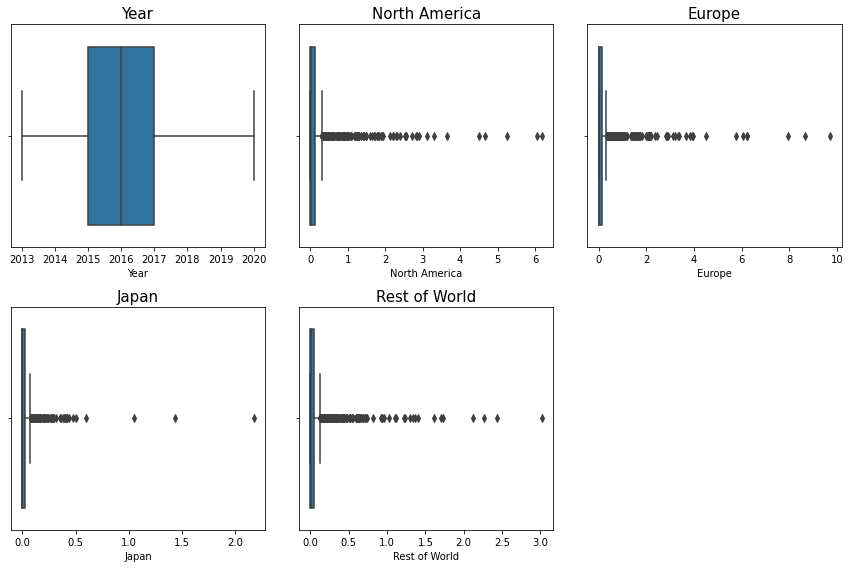

In [37]:
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (12,8))
axes = axes.flat

numericas = df_games.select_dtypes(include = np.number).columns

for i, col in enumerate(numericas):

    sns.boxplot(df_games[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 15)

fig.tight_layout()
fig.delaxes(axes[-1]);

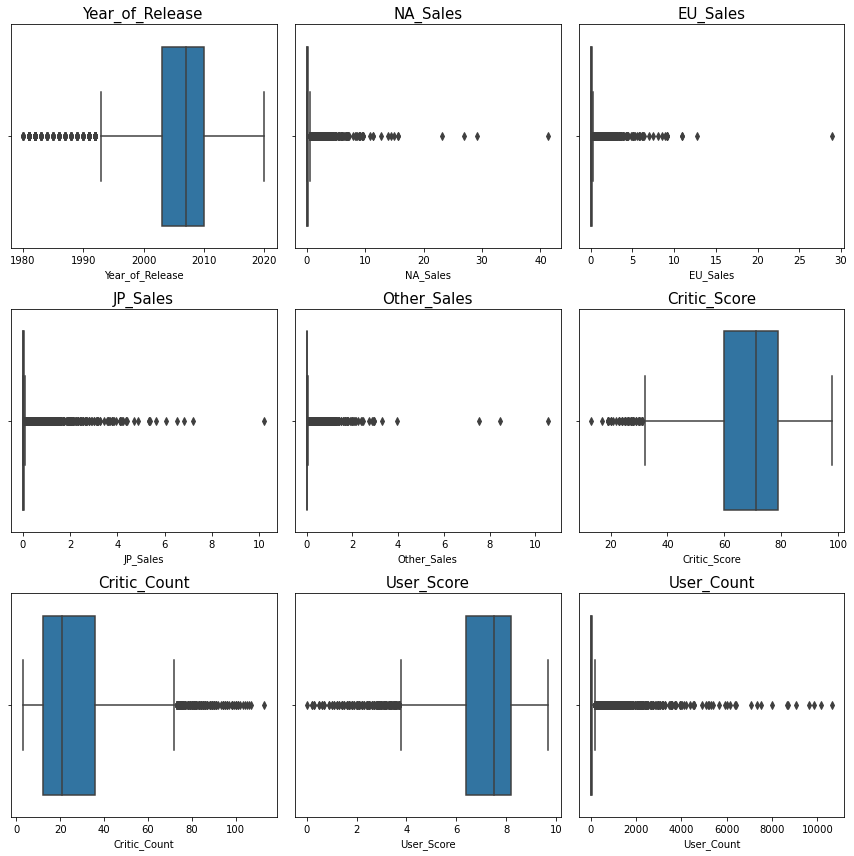

In [61]:
fig, axes = plt.subplots(nrows = 3, ncols = 3, figsize = (12,12))
axes = axes.flat

for i, col in enumerate(numericas2.columns):

    sns.boxplot(df_games2[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 15)

fig.tight_layout();

In [39]:
df_games.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,825.0,2015.966061,1.298360,2013.0,2015.0,2016.00,2017.00,2020.00
North America,1034.0,0.204613,0.563471,0.0,0.0,0.02,0.12,6.18
Europe,1034.0,0.248714,0.785491,0.0,0.0,0.00,0.13,9.71
Japan,1034.0,0.033636,0.108344,0.0,0.0,0.00,0.03,2.17
Rest of World,1034.0,0.089014,0.249410,0.0,0.0,0.01,0.05,3.02


In [43]:
df_games['Europe'].value_counts()

0.00    578
0.01     26
0.02     23
0.06     22
0.04     21
       ... 
1.60      1
1.56      1
1.50      1
2.18      1
0.93      1
Name: Europe, Length: 139, dtype: int64

In [65]:
df_games2['JP_Sales'].value_counts()

0.00    10515
0.02      741
0.01      708
0.03      546
0.04      398
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: JP_Sales, Length: 244, dtype: int64